Preparing the environment and loading the dataset

In [1]:
import pandas as pd
import numpy as np

# بارگذاری دیتاست
df = pd.read_csv("C://Users/user/Downloads/titanic/train.csv")

# نمایش ۵ ردیف اول
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Checking for missing values

In [2]:
# نمایش تعداد مقادیر گمشده
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Fill or remove missing values

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_12144\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [4]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_12144\411043493.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [5]:
df['Cabin'] = df['Cabin'].fillna('U')  # U = Unknown
df['Cabin'] = df['Cabin'].str[0]       # نگه داشتن حرف اول


Fix Outliers

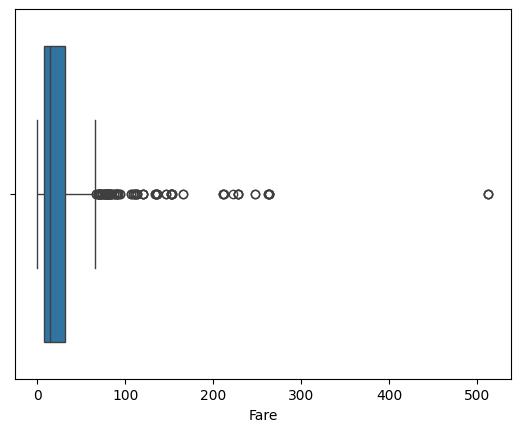

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['Fare'])
plt.show()


In [7]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < Q1 - 1.5*IQR) | (df['Fare'] > Q3 + 1.5*IQR))]


Fixing typos and standardizing categories

In [8]:
df['Sex'] = df['Sex'].str.lower().str.strip()
df['Embarked'] = df['Embarked'].str.upper().str.strip()


Feature engineering (Encoding)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Cabin'] = le.fit_transform(df['Cabin'])


In [10]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


Standardization of numerical data

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


Final preparation for the ML model

In [12]:
# حذف ستون‌های غیر ضروری
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# تقسیم ویژگی‌ها و هدف
X = df.drop('Survived', axis=1)
y = df['Survived']

print(X.head())
print(y.head())


   PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  \
0            1       3    1 -0.528321      1      0 -0.779117      8   
2            3       3    0 -0.215182      0      0 -0.729373      8   
3            4       1    0  0.489381      1      0  2.599828      2   
4            5       3    1  0.489381      0      0 -0.720161      8   
5            6       3    1 -0.058613      0      0 -0.690071      8   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  
0    0
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64
